## Senior Research Project: Analyzing Non-Educational Causes for Gender Gap in IT

#### Background:
Female employment in the information technology field consistently lags behind their male counterparts. This 'Gender Gap' in IT has persisted for many years despite focused efforts to reduce it. Many efforts are based on making educational resources available to females. However, it is possible that instructional availability is not the main cause behind the gap. This research seeks to explore other potential causes for the Gender Gap outside of educational programs.

#### Approach:
The research found data points for factors which could influence female desire or ability to pursue the male-dominated field of computer science. Because computer science is publicly seen as a "male field," this research focuses on non-educational factors which could **strengthen or weaken the enforcement of gender stereotypes**. Data was collected on these points by year and state, then compared to statistics on female employment in computer careers for the same timeframes and regions.

#### Challenges:
1. ***Finding accessible, reliable, relevant, and significant data.*** Many data sources are not open to the public, or they are only available at aggregated levels which do not show geography. Another issue arises when the data is not stored in a way which can be systematically extracted. For example, a reputable source may list data on a particular section of their website, but if there is an embedded form or non-explicit path required to retrieve it, extraction becomes timely and error-prone. Essentially, it is difficult to find data sources which are produced by reputable organizations, available to the public, include the targeted data points and slicers, and have enough data points to produce some level of statistical significance. In this research, many potential data sources were discarded in favor of higher availability, volume, and reliability.
2. ***Factor selection.*** Choosing the factors which could have influence on female employment in computer fields is subjective. Additionally, as stated above, the factors are limited further by availability of data. In this research, the factors were chosen after a list workable data sets were finalized, creating some potential selection bias. Despite this, they were chosen based on commonly known correlations to general employment outcomes.

#### Significance:
Publishing research which seeks to find other influencing factors for female employment in computer occupations may shift and expand the approaches governments, companies, and philanthropic programs take to reduce the Gender Gap in IT. It may influence other researchers to look at additional non-instructional factors for correlations, improving collective knowledge of the Gender Gap causes.

#### Data Points:
1. Female Employment in Computer Occupation - base data point
2. Female Age at First Birth - expect positive correlation where as age increases, so does employment
3. Female Participation in Male-Dominant High School Sports - expect positive correlation where as participation increases, so does employment

#### Method:
1. Data Collection: raw data from either APIs or .csv tables uploaded to online repository
2. Data Cleaning & Transformation: filter, replace, shape with Pandas and Numpy
3. Data Integration: combine tables based on primary keys for year and state
4. Data Mining & Analytics: compare data points based on geography and time
5. Interpretation and Visualization: show data on U.S. map and prove/disprove correlation

### Data Point 1: Female Employment in Computer Occupation

- Source: US Census, American Community Survey
- Database Table: S2401OCCUPATION BY SEX FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER
- URL: https://data.census.gov/table?q=occupation&g=0100000US
- Timeframe: 2010 - 2021

**Filters:**
- Occupation category == Computer and mathematical occupations
- Calculation type == Percent Female, Estimate

In [42]:
#resulting df contains year, state, female percent

import requests
import pandas as pd
import numpy as np
import re

#create transform function
def tfrm(df,x):
    df['Label (Grouping)'] = df['Label (Grouping)'].str.lstrip()
    df = df[df['Label (Grouping)'] == 'Computer and mathematical occupations']
    df = df.filter(regex='Percent Female!!Estimate$|^Year', axis="columns")
    df.columns = df.columns.str.split('!!').str[0]
    df = df.transpose()
    df.insert(loc=0, column='year', value=x)
    df.insert(loc=0, column='stateid', value=df.index)
    df.insert(loc=0, column='indexcol', value=range(len(df)))
    df.set_index('indexcol', inplace = True)
    df.rename(columns={6 : 'female_pct'}, inplace=True)
    return df

#same as other transform fucntion, except regex differs based on slight survey differences 2010-2014
def tfrm1(df,x):
    df['Label (Grouping)'] = df['Label (Grouping)'].str.lstrip()
    df = df[df['Label (Grouping)'] == 'Computer and mathematical occupations']
    df = df.filter(regex='Female!!Estimate$|^Year', axis="columns")
    df.columns = df.columns.str.split('!!').str[0]
    df = df.transpose()
    df.insert(loc=0, column='year', value=x)
    df.insert(loc=0, column='stateid', value=df.index)
    df.insert(loc=0, column='indexcol', value=range(len(df)))
    df.set_index('indexcol', inplace = True)
    df.rename(columns={6 : 'female_pct'}, inplace=True)
    return df

#read in reports from github and apply transform function
dp1_2021 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/ACSST1Y2021.S2401-2022-11-20T035601.csv')
dp1_2021 = tfrm(dp1_2021,'2021')
dp1_2020 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/ACSST5Y2020.S2401-2022-11-20T203038.csv')
dp1_2020 = tfrm(dp1_2020,'2020')
dp1_2019 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/ACSST1Y2019.S2401-2022-11-20T210456.csv')
dp1_2019 = tfrm(dp1_2019,'2019')
dp1_2018 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/ACSST1Y2018.S2401-2022-11-20T210520.csv')
dp1_2018 = tfrm(dp1_2018,'2018')
dp1_2017 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/ACSST1Y2017.S2401-2022-11-20T210532.csv')
dp1_2017 = tfrm(dp1_2017,'2017')
dp1_2016 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/ACSST1Y2016.S2401-2022-11-20T210540.csv')
dp1_2016 = tfrm(dp1_2016,'2016')
dp1_2015 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/ACSST1Y2015.S2401-2022-11-20T210551.csv')
dp1_2015 = tfrm(dp1_2015,'2015')
dp1_2014 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/ACSST1Y2014.S2401-2022-11-20T210601.csv')
dp1_2014 = tfrm1(dp1_2014,'2014')
dp1_2013 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/ACSST1Y2013.S2401-2022-11-20T210611.csv')
dp1_2013 = tfrm1(dp1_2013,'2013')
dp1_2012 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/ACSST1Y2012.S2401-2022-11-20T210619.csv')
dp1_2012 = tfrm1(dp1_2012,'2012')
dp1_2011 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/ACSST1Y2011.S2401-2022-11-20T210627.csv')
dp1_2011 = tfrm1(dp1_2011,'2011')
dp1_2010 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/ACSST1Y2010.S2401-2022-11-20T210634.csv')
dp1_2010 = tfrm1(dp1_2010,'2010')

#combine reports
dp1 = dp1_2021.append(dp1_2020)
dp1 = dp1.append(dp1_2019)
dp1 = dp1.append(dp1_2018)
dp1 = dp1.append(dp1_2017)
dp1 = dp1.append(dp1_2016)
dp1 = dp1.append(dp1_2015)
dp1 = dp1.append(dp1_2014)
dp1 = dp1.append(dp1_2013)
dp1 = dp1.append(dp1_2012)
dp1 = dp1.append(dp1_2011)
dp1 = dp1.append(dp1_2010)

#replace nan values
dp1 = dp1.fillna(0)

#create pk column
dp1.insert(loc=0, column='yearstate', value=dp1['year']+dp1['stateid'])

print(dp1)

C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\185815421.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp1 = dp1_2021.append(dp1_2020)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\185815421.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp1 = dp1.append(dp1_2019)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\185815421.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp1 = dp1.append(dp1_2018)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\185815421.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp1 = dp1.append(dp1_2017)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\1858

                  yearstate        stateid  year female_pct
indexcol                                                   
0               2021Alabama        Alabama  2021      29.4%
1                2021Alaska         Alaska  2021      16.7%
2               2021Arizona        Arizona  2021      25.8%
3              2021Arkansas       Arkansas  2021      22.3%
4            2021California     California  2021      24.4%
...                     ...            ...   ...        ...
47           2010Washington     Washington  2010      24.4%
48        2010West Virginia  West Virginia  2010      29.5%
49            2010Wisconsin      Wisconsin  2010      31.9%
50              2010Wyoming        Wyoming  2010      17.8%
51          2010Puerto Rico    Puerto Rico  2010      26.7%

[624 rows x 4 columns]


C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\185815421.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp1 = dp1.append(dp1_2014)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\185815421.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp1 = dp1.append(dp1_2013)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\185815421.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp1 = dp1.append(dp1_2012)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\185815421.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp1 = dp1.append(dp1_2011)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\185815421

### Data Point 2: Female Age at First Birth

- Source: US Census, Current Population Survey
- Database Table: Fertility Supplement
- URL: https://api.census.gov/data/2018/cps/fertility/jun.html
- Timeframe: Jun 2010 - Jun 2020 (every 2 years)

**Filters:**
- PTSAYFC - Age of woman at birth of first child
- PESAYC - Age of woman in *months* at birth of *last* child (2010 variable, may need to exclude due to relevance)
- GESTFIPS - FIPS state code

In [44]:
#resulting df contains year, state, age

import requests
import pandas as pd
import numpy as np

key = '384d1fb6204a0c749ec789804e3f17267c9fce1f'

#create transform function for years 2012-2020
def tfrm2(url,y):
    r = requests.get(url = url)
    data = r.json()
    dp2 = pd.DataFrame(data, columns = ['state', 'age'])
    dp2 = dp2.iloc[1:]
    ageser = pd.Series(dp2['age'])
    dp2['age'] = pd.to_numeric(ageser)
    dp2.drop(dp2[dp2['age'] < 0].index, inplace = True)
    dp2 = pd.DataFrame(dp2.groupby('state')['age'].mean())
    dp2.insert(loc=0, column='stateid', value=dp2.index)
    dp2.insert(loc=0, column='indexcol', value=range(len(dp2)))
    dp2.set_index('indexcol', inplace = True)
    stateser1 = pd.Series(dp2['stateid'])
    dp2['stateid'] = pd.to_numeric(stateser1)
    dp2.insert(loc=0, column='year', value=y)
    return dp2

#same as tfrm2 but includes month-to-year conversion for age based on different census variable in 2010 survey
def tfrm3(url,y):
    r = requests.get(url = url)
    data = r.json()
    dp2 = pd.DataFrame(data, columns = ['state', 'age'])
    dp2 = dp2.iloc[1:]
    ageser = pd.Series(dp2['age'])
    dp2['age'] = pd.to_numeric(ageser, downcast='unsigned')
    dp2['age'] = dp2['age']/12
    dp2.drop(dp2[dp2['age'] < 0].index, inplace = True)
    dp2 = pd.DataFrame(dp2.groupby('state')['age'].mean())
    dp2.insert(loc=0, column='stateid', value=dp2.index)
    dp2.insert(loc=0, column='indexcol', value=range(len(dp2)))
    dp2.set_index('indexcol', inplace = True)
    stateser1 = pd.Series(dp2['stateid'])
    dp2['stateid'] = pd.to_numeric(stateser1)
    dp2.insert(loc=0, column='year', value=y)
    return dp2

#apply transform function to URLs to call census API and transform results
url20 = 'https://api.census.gov/data/2020/cps/fertility/jun?get=GESTFIPS,PTSAYFC&key={key}'.format(key=key)
dp2_2020 = tfrm2(url20,'2020')
url18 = 'https://api.census.gov/data/2018/cps/fertility/jun?get=GESTFIPS,PTSAYFC&key={key}'.format(key=key)
dp2_2018 = tfrm2(url18,'2018')
url16 = 'https://api.census.gov/data/2016/cps/fertility/jun?get=GESTFIPS,PTSAYFC&key={key}'.format(key=key)
dp2_2016 = tfrm2(url16,'2016')
url14 = 'https://api.census.gov/data/2014/cps/fertility/jun?get=GESTFIPS,PTSAYFC&key={key}'.format(key=key)
dp2_2014 = tfrm2(url14,'2014')
url12 = 'https://api.census.gov/data/2012/cps/fertility/jun?get=GESTFIPS,PTSAYFC&key={key}'.format(key=key)
dp2_2012 = tfrm2(url12,'2012')
url10 = 'https://api.census.gov/data/2010/cps/fertility/jun?get=GESTFIPS,PESAYC&key={key}'.format(key=key)
dp2_2010 = tfrm3(url10,'2010')

#combine tables for each year
dp2 = dp2_2020.append(dp2_2018)
dp2 = dp2.append(dp2_2016)
dp2 = dp2.append(dp2_2014)
dp2 = dp2.append(dp2_2012)
dp2 = dp2.append(dp2_2010)

#import state code reference from repository as dataframe
url2 = 'https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/fips_state.csv'
stateref = pd.read_csv(url2)
stateref.rename(columns={'FIPS State Numeric Code': 'stateid'}, inplace=True)
stateref.rename(columns={'Name': 'statename'}, inplace=True)
stateref.rename(columns={'Official USPS Code': 'State'}, inplace=True)
stateser = pd.Series(stateref['stateid'])
stateref['stateid'] = pd.to_numeric(stateser)

#merge census data and state code reference table
dp2 = pd.merge(dp2, stateref, on='stateid', how='left')

#create pk column
dp2.insert(loc=0, column='yearstate', value=dp2['year']+dp2['statename'])

print(dp2)

C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\2000771178.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp2 = dp2_2020.append(dp2_2018)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\2000771178.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp2 = dp2.append(dp2_2016)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\2000771178.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp2 = dp2.append(dp2_2014)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\2000771178.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp2 = dp2.append(dp2_2012)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\

                    yearstate  year  stateid        age             statename  \
0                 2020Alabama  2020        1  24.598456               Alabama   
1                2020Delaware  2020       10  25.840426              Delaware   
2    2020District of Columbia  2020       11  28.453846  District of Columbia   
3                 2020Florida  2020       12  25.514634               Florida   
4                 2020Georgia  2020       13  24.853933               Georgia   
..                        ...   ...      ...        ...                   ...   
301             2010Wisconsin  2010       55  28.093066             Wisconsin   
302               2010Wyoming  2010       56  26.618739               Wyoming   
303            2010California  2010        6  28.095827            California   
304              2010Colorado  2010        8  28.562500              Colorado   
305           2010Connecticut  2010        9  28.908076           Connecticut   

    State  
0      AL  
1  

### Data Point 3: Female Participation in Male-Dominated High School Sports

- Source: National Federation of State High School Assocations (NFHS)
- Database Table: Participation Statistics
- URL: https://members.nfhs.org/participation_statistics
- Timeframe: 2002 - 2019

**Filters:**
- Male-Dominated Sport Indicator (calculated as < 50% girls participation in aggregate)

In [66]:
#resulting df contains year, state, sport, girls participation count, girls participation pct

import requests
import pandas as pd
import numpy as np

#read in report .csv from github
df5 = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/cuny_capstone/main/partcipation_statistics_11_20_2022%2011_35.csv')

#identify male-dominated sports
df6 = df5.groupby('Sport')['Boys Participation','Girls Participation'].sum()
gppct = df6['Girls Participation']/(df6['Boys Participation']+df6['Girls Participation'])
df6.insert(loc=2, column='gppct', value=gppct)
maledomvalue = np.where(df6['gppct']<0.5, 1, 0)
df6.insert(loc=3, column='maledom', value=maledomvalue)
df6 = df6.dropna()

#add columns for participation by gender
df5 = df5.loc[~((df5['Boys Participation'] == 0) & (df5['Girls Participation'] == 0))]
gppct2 = df5['Girls Participation']/(df5['Boys Participation']+df5['Girls Participation'])
df5.insert(loc=7, column='girls_pct', value=gppct2)
df5['girls_pct'] = df5['girls_pct'].fillna(0)

#add in maledom column from other df
df5 = pd.merge(df5, df6, on ='Sport', how ='left')

#split year columns for future joins
yearcols = df5['Year'].str.split(pat = '/', expand = True)
df5[['startyear', 'endyear']] = yearcols

#merge two tables together
df5 = pd.merge(df5, stateref, on='State', how='left')

#final dataframe with only male-dominated sports filter
df7 = df5[['startyear', 'endyear', 'State', 'statename', 'Sport', 'girls_pct', 'maledom']]
df7 = df7.query('maledom == 1')

#create pk column
df7.insert(loc=0, column='yearstate', value=df7['startyear']+df7['statename'])

print(df7)

       yearstate startyear endyear State statename  \
0    2018Alabama      2018    2019    AL   Alabama   
1    2018Alabama      2018    2019    AL   Alabama   
2    2018Alabama      2018    2019    AL   Alabama   
3    2018Alabama      2018    2019    AL   Alabama   
4    2018Alabama      2018    2019    AL   Alabama   
5    2018Alabama      2018    2019    AL   Alabama   
6    2018Alabama      2018    2019    AL   Alabama   
8    2018Alabama      2018    2019    AL   Alabama   
12   2018Alabama      2018    2019    AL   Alabama   
13   2018Alabama      2018    2019    AL   Alabama   
15   2018Alabama      2018    2019    AL   Alabama   
16    2018Alaska      2018    2019    AK    Alaska   
17    2018Alaska      2018    2019    AK    Alaska   
18    2018Alaska      2018    2019    AK    Alaska   
21    2018Alaska      2018    2019    AK    Alaska   
25    2018Alaska      2018    2019    AK    Alaska   
27    2018Alaska      2018    2019    AK    Alaska   
29    2018Alaska      2018  

C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\3931496703.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df6 = df5.groupby('Sport')['Boys Participation','Girls Participation'].sum()
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_53168\3931496703.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['girls_pct'] = df5['girls_pct'].fillna(0)


### Create Database for Integration and Analytics

1. Create local database
2. Query database for data point comparison by year and state
3. Store resulting table as dataframe for further analysis and visualization

In [67]:
import pandas as pd
import requests
import urllib
import sqlite3

#create db connection and cursor, then execute script to build tables
conn = sqlite3.connect('gapdb')
c = conn.cursor()
c.executescript("""DROP TABLE IF EXISTS [computerjob_rate];
    DROP TABLE IF EXISTS [age_atbirth];
    DROP TABLE IF EXISTS [sport_participation];
    CREATE TABLE computerjob_rate (id INTEGER PRIMARY KEY, year INTEGER, stateid VARCHAR(200), female_pct FLOAT);
    CREATE TABLE age_atbirth (id INTEGER PRIMARY KEY, year INTEGER, age FLOAT, statename VARCHAR(200));
    CREATE TABLE sport_participation (id INTEGER PRIMARY KEY, startyear INTEGER, endyear INTEGER, State VARCHAR(200), girls_pct FLOAT);
""")

#populate tables using dataframes from previous steps
dp1.to_sql('computerjob_rate', conn, if_exists='replace', index = False)
dp2.to_sql('age_atbirth', conn, if_exists='replace', index = False)
df7.to_sql('sport_participation', conn, if_exists='replace', index = False)

#create query to join the tables based on year and state
sql_query = pd.read_sql_query ('''SELECT computerjob_rate.year AS 'Year', computerjob_rate.stateid AS 'State', computerjob_rate.female_pct AS 'Pct Female Employment', age_atbirth.age AS 'Age at First Birth', AVG(sport_participation.girls_pct) AS 'Pct Girls in Male Sports'
    FROM computerjob_rate
    JOIN age_atbirth ON age_atbirth.yearstate = computerjob_rate.yearstate
    JOIN sport_participation ON sport_participation.yearstate = computerjob_rate.yearstate
    GROUP BY computerjob_rate.year, computerjob_rate.stateid''', conn)

#load the query results as a dataframe object
gapdata = pd.DataFrame(sql_query)

#realized later that Pct Female Employment needs to be turned into float
gapdata['Pct Female Employment'] = gapdata['Pct Female Employment'].str.split('%').str[0]
gapdata['Pct Female Employment'] = pd.to_numeric(gapdata['Pct Female Employment'], downcast = 'unsigned')
gapdata['Pct Female Employment'] = gapdata['Pct Female Employment'] / 100

print(gapdata.head(50))

conn.commit()


    Year                 State  Pct Female Employment  Age at First Birth  \
0   2010               Alabama                  0.284           27.086498   
1   2010                Alaska                  0.210           26.960145   
2   2010               Arizona                  0.274           27.799716   
3   2010              Arkansas                  0.295           25.932059   
4   2010            California                  0.254           28.095827   
5   2010              Colorado                  0.252           28.562500   
6   2010           Connecticut                  0.284           28.908076   
7   2010              Delaware                  0.314           28.381213   
8   2010  District of Columbia                  0.349           27.882316   
9   2010               Florida                  0.254           27.889055   
10  2010               Georgia                  0.288           27.593948   
11  2010                Hawaii                  0.210           27.594250   

### Use Visuals and Statistical Methods to Interpret the Data

The last step is to visualize and interpret the data based on statistical methods.

#### Visualization - Charts

The following code blocks visualize the data on line charts and scatter plots.

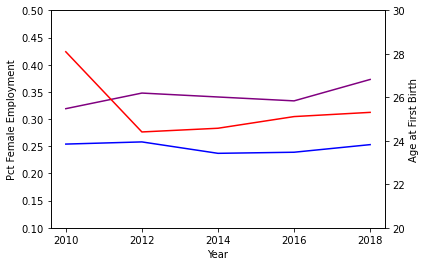

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

#plot two data points for one state
gapdatas = gapdata.query("State == 'California'")
x = gapdatas['Year']
y = gapdatas['Pct Female Employment']
y1 = gapdatas['Age at First Birth']
y2 = gapdatas['Pct Girls in Male Sports']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_ylim(0.1,0.5)
ax2.set_ylim(20,30)

sns.lineplot(x=x, y=y, ax=ax1, color='blue')
sns.lineplot(x=x, y=y1, ax=ax2, color='red')
sns.lineplot(x=x, y=y2, ax=ax1, color='purple')

plt.show()

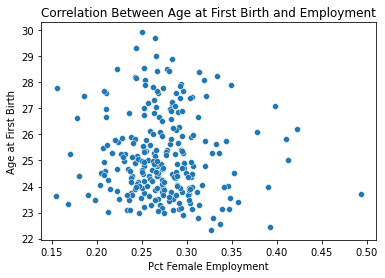

In [145]:
import seaborn as sns

sns.scatterplot(data=gapdata, x='Pct Female Employment', y='Age at First Birth')
plt.title('Correlation Between Age at First Birth and Employment')

plt.show()

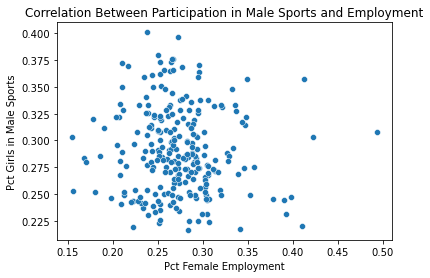

In [146]:
import seaborn as sns

sns.scatterplot(data=gapdata, x='Pct Female Employment', y='Pct Girls in Male Sports')
plt.title('Correlation Between Participation in Male Sports and Employment')

plt.show()

#### Interpretation - statistical values

The following code block looks at statistical significance in correlations between data points by state. Each observation point is by year.

Strong correlations are generally accepted as when the correlation coefficient is close to 1 or -1. The closer to zero a correlation coefficient is, the weaker the correlation.

In [241]:
import numpy as np
import scipy.stats

#find rvalues (strength of correlation) for Employment and Age at Birth by state
def stateCorr1(dfs):
    corrdata = {}
    length=len(dfs)
    x=0
    while x < length:
        name = dfs.iloc[x,4]
        dfs1 = dfs[dfs['State'] == name]
        corr, pvalue = scipy.stats.pearsonr(dfs1['Pct Female Employment'], dfs1['Age at First Birth'])
        corrdata.update({name: [corr, pvalue]})
        x=x+1
    return corrdata

agecorr = stateCorr1(gapdata)

#find rvalues (strength of correlation) for Employment and Sport Participation by state
def stateCorr2(dfs):
    corrdata2 = {}
    length2=len(dfs)
    x2=0
    while x2 < length2:
        name = dfs.iloc[x2,4]
        dfs2 = dfs[dfs['State'] == name]
        corr, pvalue = scipy.stats.pearsonr(dfs2['Pct Female Employment'], dfs2['Pct Girls in Male Sports'])
        corrdata2.update({name: [corr, pvalue]})
        x2=x2+1
    return corrdata2

sportcorr = stateCorr2(gapdata)

#create table to show all correlation coefficients together for age data points
agecorrdf = pd.DataFrame(list(agecorr.items()), columns = ['State', 'AFB_corr'])
agecorrdf.rename(columns = {'AFB_corr':'AFB_corrl'}, inplace = True) 
split1 = pd.DataFrame(agecorrdf['AFB_corrl'].to_list(), columns = ['AFB_corr', 'AFB_p'])
agecorrdf = pd.concat([agecorrdf, split1], axis=1)

#create table to show all correlation coefficients together for sports data points
sportcorrdf = pd.DataFrame(list(sportcorr.items()), columns = ['State', 'GPMS_corr'])
sportcorrdf.rename(columns = {'GPMS_corr':'GPMS_corrl'}, inplace = True) 
split2 = pd.DataFrame(sportcorrdf['GPMS_corrl'].to_list(), columns = ['GPMS_corr', 'GPMS_p'])
sportcorrdf = pd.concat([sportcorrdf, split2], axis=1)

#merge tables together
corrdf = pd.merge(agecorrdf, sportcorrdf, on='State', how='left')
corrdf = corrdf.drop(['AFB_corrl'], axis=1)
corrdf = corrdf.drop(['GPMS_corrl'], axis=1)
corrdf = corrdf[['State', 'AFB_corr', 'GPMS_corr', 'AFB_p', 'GPMS_p']]

#conditional formatting for corr coefficients and p-values
def cond_formatting_corr(x):
    if x > 0.75 or x < -0.75:
        return 'background-color: lightgreen'
    else:
        return None
    
def cond_formatting_p(x):
    if x < 0.05:
        return 'background-color: lightblue'
    else:
        return None

#apply conditional formatting to highlight significant correlations and p-values
v1 = corrdf.style.applymap(cond_formatting_corr, subset=['AFB_corr', 'GPMS_corr'])
v2 = v1.applymap(cond_formatting_p, subset=['AFB_p', 'GPMS_p'])
display(v2)

,State,AFB_corr,GPMS_corr,AFB_p,GPMS_p
0,Alabama,0.041085,0.439889,0.947703,0.458543
1,Alaska,-0.635037,0.099759,0.249673,0.873194
2,Arizona,0.659926,0.126185,0.225525,0.839764
3,Arkansas,0.040891,-0.571430,0.947950,0.314239
4,California,0.303412,0.219653,0.619696,0.722594
5,Colorado,0.672626,-0.903505,0.213467,0.035457
6,Connecticut,0.401012,-0.621369,0.503451,0.263212
7,Delaware,0.406161,0.113346,0.497452,0.855993
8,District of Columbia,-0.400273,0.249307,0.504313,0.685892
9,Florida,0.160698,0.206608,0.796277,0.738822


### Conclusions

The conclusion is that for most states there is no correlation between female employment in computer jobs and the non-instructional data points chosen, when compared by year.

Interestingly, there are some states which do show a strong statistical correlation and significant p-value:
- South Carolina (age)
- Pennsylvania (age)
- North Dakota (sports)
- Montana (age)
- Missouri (sports)
- Georgia (sports)
- Colorado (sports)

However, even with these significant correlations, some of the correlation directions are not as expected. For example, South Carolina's correlation between 'Female Employment in Computer Jobs' and 'Female Age at First Birth' is **negative**/**inverse**, which means that as one data point decreases the other increases. In other words, as moms got younger, the employment percent increased. This is an unexpected pattern without an immediate explanation.

The data from this research suggests that girls' participation in male-dominated sports and the age women become mothers may have an impact on the gender gap, although the data is not consistent across geographies.

Conclusions could be strengthened by expanding the data set and using different geographical boundaries. Additionally, further research could explore offsetting the non-instructional factors to test the hypothesis that effects (female employment) may occur 1+ years after the causes (girls' participation in male-dominated sports, age women become mothers).

Although the direct causes of the gender gap have not been identified here, this study may serve as a framework for future research into other non-instructional factors which may influence the gender gap.